In [48]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import cross_validate, learning_curve, train_test_split
from sklearn.linear_model import LinearRegression


In [49]:
# Dropping rows with NaN in "Total Square Feet" for 1-bedroom properties 
jamaicadf = pd.read_excel("rentalsJamaica.xlsx")

In [50]:
jamaicaOneBrnonan = jamaicadf[jamaicadf["Beds"] == 1].dropna(subset=["Total Square Feet"])
jamaicaOneBrnonan["Price"].describe()


count     384.000000
mean     2154.789062
std       412.077789
min       750.000000
25%      1901.500000
50%      2165.000000
75%      2427.750000
max      3406.000000
Name: Price, dtype: float64

<Axes: title={'center': 'Rental Price Trend for 1-Bedroom Apartments'}, xlabel='Total Square Feet', ylabel='Price'>

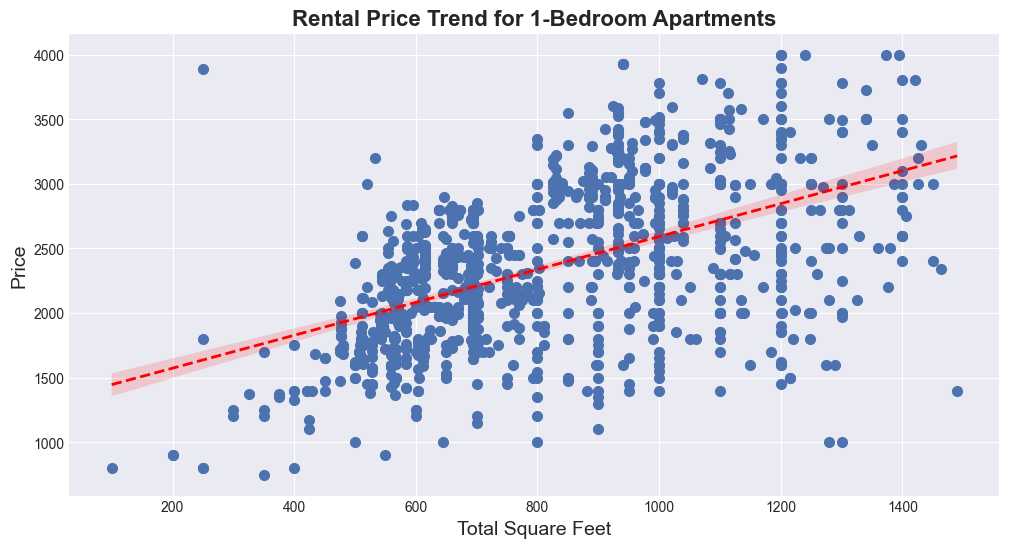

In [102]:
# Trend Analysis for all apartments in Jamaica
jamaicadf = jamaicadf.dropna(subset=["Total Square Feet", "Price"])

plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(12, 6))

# Filter for Total Square Feet < 1500
filteredx = jamaicadf["Total Square Feet"][jamaicadf["Total Square Feet"] < 1500]
filteredy = jamaicadf["Price"][jamaicadf["Total Square Feet"] < 1500]

# Remove price outliers using IQR method
Q1 = filteredy.quantile(0.25)
Q3 = filteredy.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filteredx_no_outlier = filteredx[(filteredy >= lower_bound) & (filteredy <= upper_bound)]
filteredy_no_outlier = filteredy[(filteredy >= lower_bound) & (filteredy <= upper_bound)]

ax.scatter(filteredx_no_outlier, filteredy_no_outlier, label='Jamaica', color='#4C72B0', linewidth=2)
ax.set_title("Rental Price Trend for 1-Bedroom Apartments", fontsize=16, fontweight='bold')
ax.set_xlabel("Total Square Feet", fontsize=14)
ax.set_ylabel("Price ($)", fontsize=14)

# Trendline
sns.regplot(x=filteredx_no_outlier, y=filteredy_no_outlier, scatter=False, ax=ax, color='red', line_kws={'linewidth': 2, 'linestyle': '--'})

In [51]:
jamaicaOneBrnonan["Total Square Feet"].describe()


count     384.000000
mean      686.578125
std       243.146388
min       100.000000
25%       596.000000
50%       660.000000
75%       694.000000
max      2800.000000
Name: Total Square Feet, dtype: float64

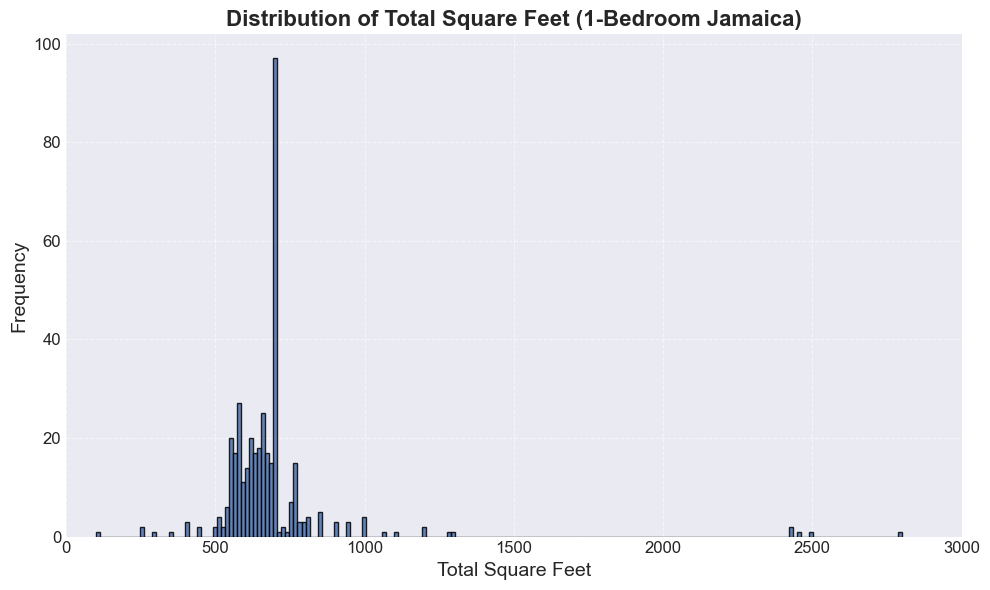

In [77]:
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(jamaicaOneBrnonan["Total Square Feet"], bins=200, color='#4C72B0', edgecolor='black', alpha=0.85)
ax.set_xlim(0, 3000)
ax.set_title("Distribution of Total Square Feet (1-Bedroom Jamaica)", fontsize=16, fontweight='bold')
ax.set_xlabel("Total Square Feet", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

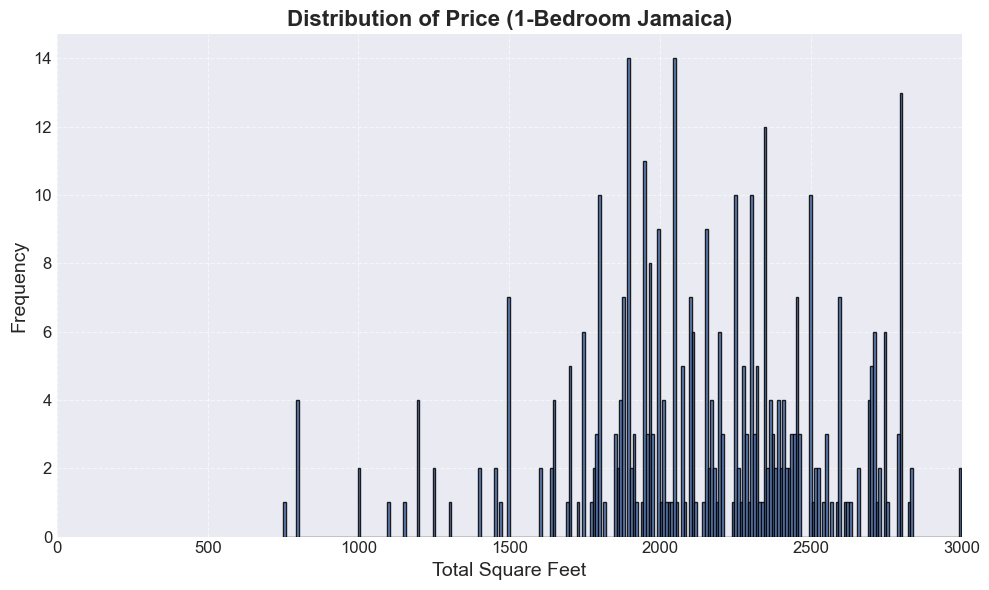

In [53]:
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(jamaicaOneBrnonan["Price"], bins=300, color='#4C72B0', edgecolor='black', alpha=0.85)
ax.set_xlim(0, 3000)
ax.set_title("Distribution of Price (1-Bedroom Jamaica)", fontsize=16, fontweight='bold')
ax.set_xlabel("Total Square Feet", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [54]:
nycdf = pd.read_excel("rentalsNYC.xlsx")

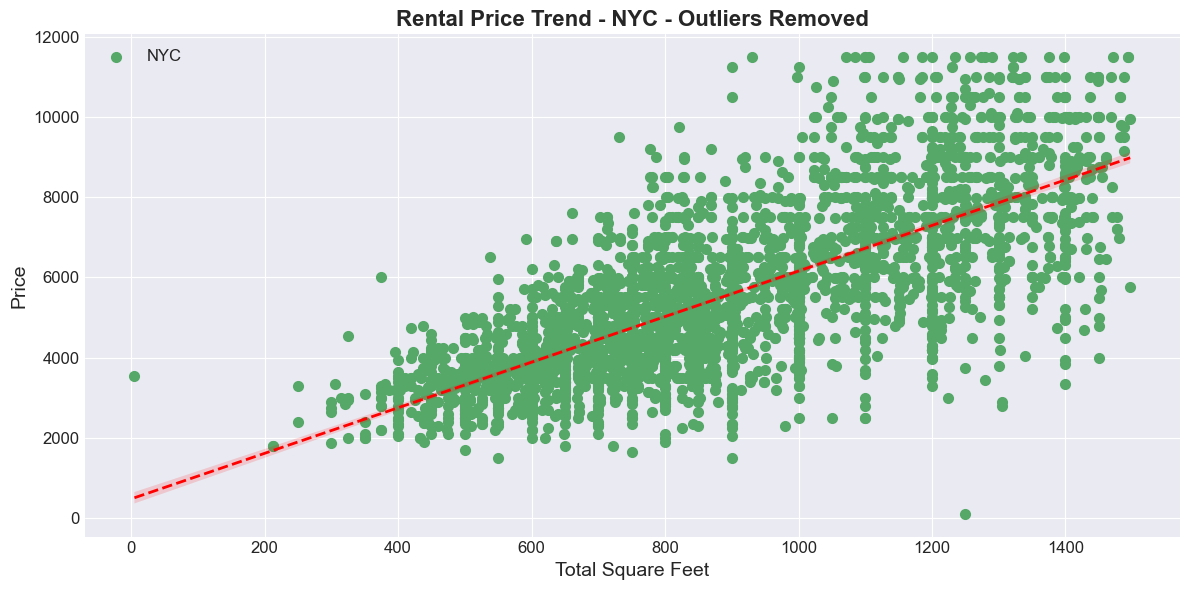

Mean Squared Error (5-Fold CV): 73157550.09


In [101]:
# Trend Analysis for all apartments in NYC
nycdf = nycdf.dropna(subset=["Total Square Feet", "Price"])
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(12, 6))
filteredx = nycdf["Total Square Feet"][nycdf["Total Square Feet"] < 1500]
filteredy = nycdf["Price"][nycdf["Total Square Feet"] < 1500]
# Remove price outliers using IQR method
Q1 = filteredy.quantile(0.25)
Q3 = filteredy.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filteredx_no_outlier = filteredx[(filteredy >= lower_bound) & (filteredy <= upper_bound)]
filteredy_no_outlier = filteredy[(filteredy >= lower_bound) & (filteredy <= upper_bound)]
ax.scatter(filteredx_no_outlier, filteredy_no_outlier, label='NYC', color='#55A868', linewidth=2)
ax.set_title("Rental Price Trend - NYC - Outliers Removed", fontsize=16, fontweight='bold')
ax.set_xlabel("Total Square Feet", fontsize=14)
ax.set_ylabel("Price ($)", fontsize=14)
# Add Trendline
sns.regplot(x=filteredx_no_outlier, y=filteredy_no_outlier,scatter=False, ax=ax, color='red', line_kws={'linewidth': 2, 'linestyle': '--'})
ax.legend(fontsize=12)
ax.tick_params(axis='both', labelsize=12)
plt.tight_layout()
plt.show()
# Linear Regression Model for NYC all apartments
X = nycdf[["Total Square Feet"]]
y = nycdf["Price"]
model = LinearRegression()
model.fit(X, y)
# Model Evaluation
cv_results = cross_validate(model, X, y, cv=5, scoring='neg_mean_squared_error')
mean_mse = -np.mean(cv_results['test_score'])
print(f"Mean Squared Error (5-Fold CV): {mean_mse:.2f}")

In [55]:
# Preprocessing Examine Missing Values
nycdfOneB = nycdf[nycdf["Beds"] == 1]
nycdfOneB["Total Square Feet"].describe()
nycdfOneB["Price"].describe()

count     1789.000000
mean      5220.825601
std       2079.782428
min        500.000000
25%       3800.000000
50%       4800.000000
75%       6000.000000
max      25000.000000
Name: Price, dtype: float64

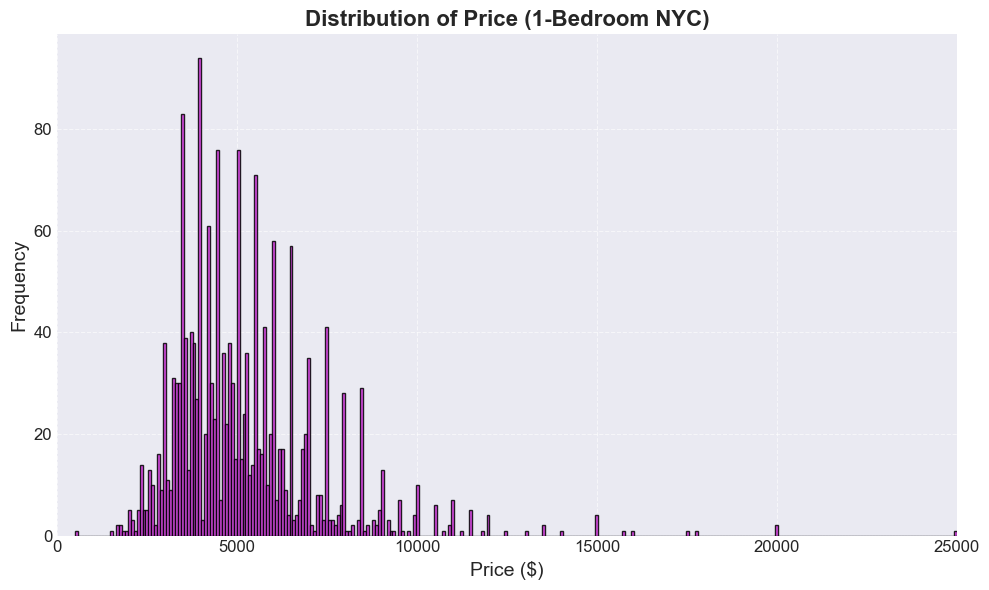

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(nycdfOneB["Price"], bins=300, color="#D633E2", edgecolor='black', alpha=0.85)
ax.set_xlim(0, 25000)
ax.set_title("Distribution of Price (1-Bedroom NYC)", fontsize=16, fontweight='bold')
ax.set_xlabel("Price ($)", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

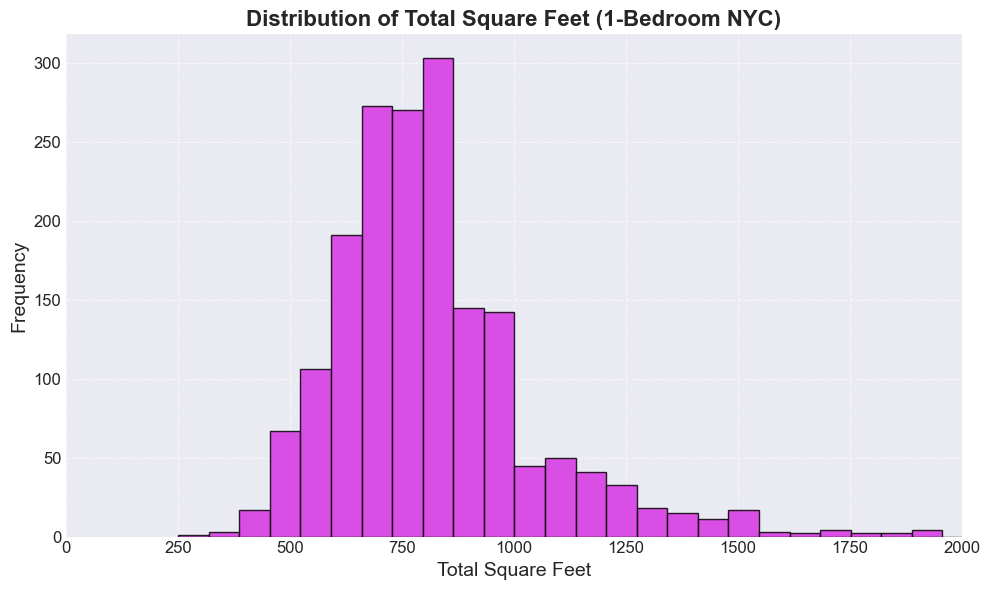

In [57]:
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(nycdfOneB["Total Square Feet"], bins=300, color="#D633E2", edgecolor='black', alpha=0.85)
ax.set_xlim(0, 2000)
ax.set_title("Distribution of Total Square Feet (1-Bedroom NYC)", fontsize=16, fontweight='bold')
ax.set_xlabel("Total Square Feet", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

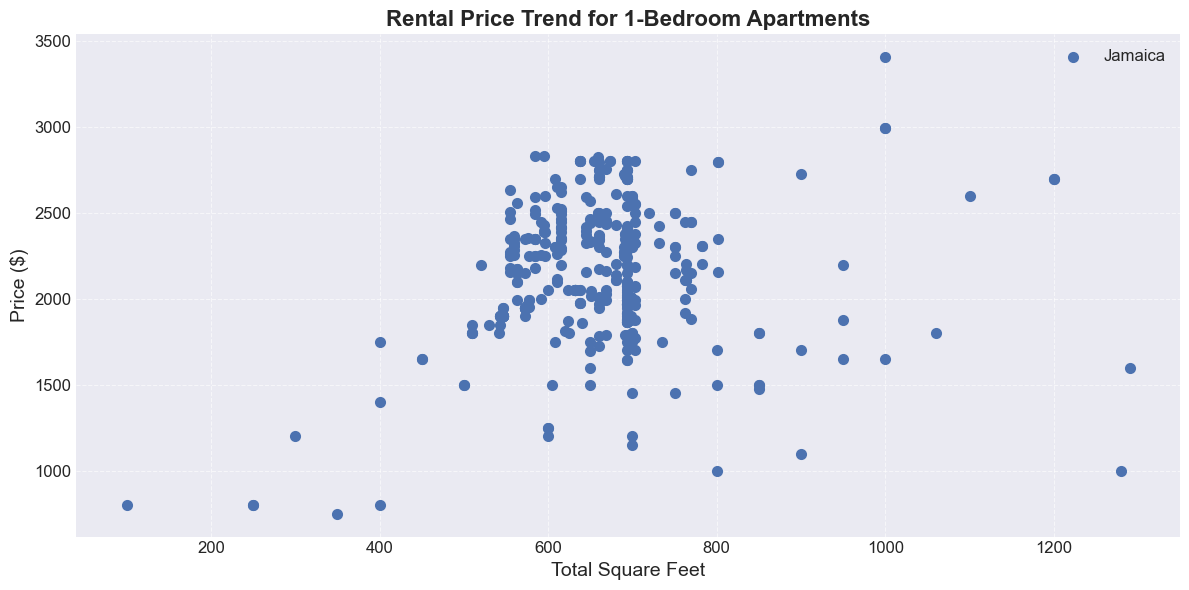

Mean Squared Error: 216325.14
R-squared: -0.03


In [86]:
# Rental Price trend for one bedroom apartments in Jamaica and NYC
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(12, 6))
filteredx = jamaicaOneBrnonan["Total Square Feet"][jamaicaOneBrnonan["Total Square Feet"] < 1500]
filteredy = jamaicaOneBrnonan["Price"][jamaicaOneBrnonan["Total Square Feet"] < 1500]
ax.scatter(filteredx, filteredy, label='Jamaica', color='#4C72B0', linewidth=2)
ax.set_title("Rental Price Trend for 1-Bedroom Apartments", fontsize=16, fontweight='bold')
ax.set_xlabel("Total Square Feet", fontsize=14)
ax.set_ylabel("Price ($)", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.legend(fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
# Regression Analysis
X = jamaicaOneBrnonan[["Total Square Feet"]][jamaicaOneBrnonan["Total Square Feet"] < 1500]
y = jamaicaOneBrnonan["Price"][jamaicaOneBrnonan["Total Square Feet"] < 1500]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


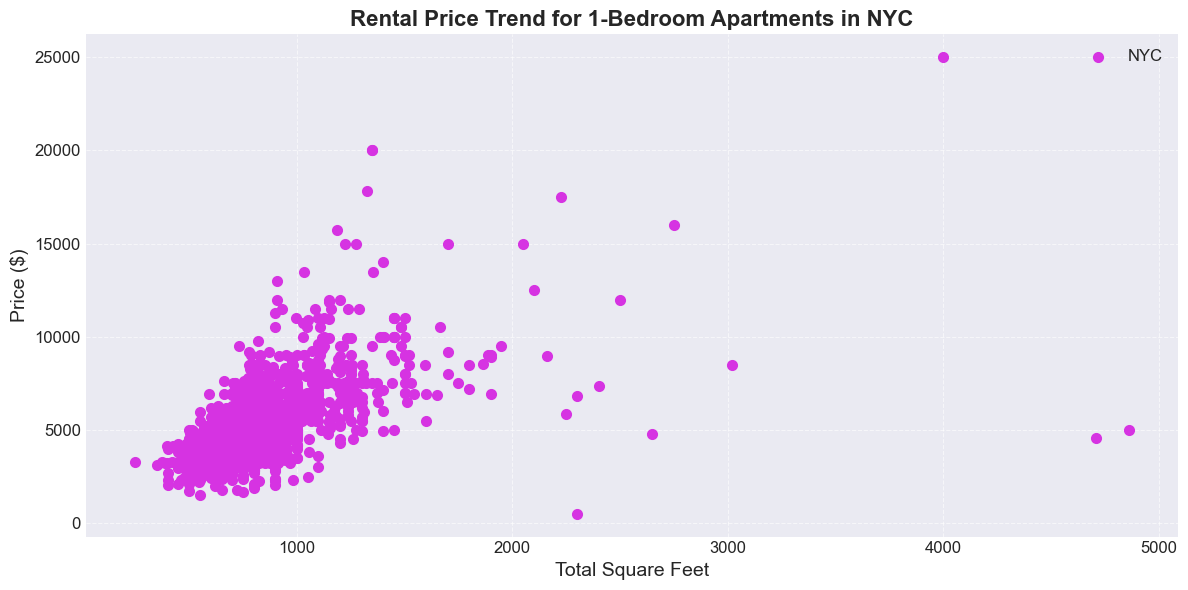

NYC Mean Squared Error: 1670635.61
NYC R-squared: 0.43
Logistic Regression Accuracy: 0.05
Elastic Net Mean Squared Error: 2514465.14
Elastic Net R-squared: 0.45
Logistic Regression Accuracy: 0.05
Elastic Net Mean Squared Error: 2514465.14
Elastic Net R-squared: 0.45


/Users/owenhuang/.pyenv/versions/MLDLNEW/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
# Rental Price Trend for one bedroom apartments in NYC
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(12, 6))
filteredx = nycdfOneB["Total Square Feet"][nycdfOneB["Total Square Feet"] < 5000]
filteredy = nycdfOneB["Price"][nycdfOneB["Total Square Feet"] < 5000]
ax.scatter(filteredx, filteredy, label='NYC', color='#D633E2', linewidth=2)
ax.set_title("Rental Price Trend for 1-Bedroom Apartments in NYC", fontsize=16, fontweight='bold')
ax.set_xlabel("Total Square Feet", fontsize=14)
ax.set_ylabel("Price ($)", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.legend(fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
# Regression Analysis for NYC
nycdfOneBnonan = nycdfOneB.dropna(subset=["Total Square Feet", "Price"])
X_nyc = nycdfOneBnonan[["Total Square Feet"]][nycdfOneBnonan["Total Square Feet"] < 2000]
y_nyc = nycdfOneBnonan["Price"][nycdfOneBnonan["Total Square Feet"] < 2000]
X_train_nyc, X_test_nyc, y_train_nyc, y_test_nyc = train_test_split(X_nyc, y_nyc, test_size=0.2)
model_nyc = LinearRegression()
model_nyc.fit(X_train_nyc, y_train_nyc)
y_pred_nyc = model_nyc.predict(X_test_nyc)
# Model Evaluation for NYC
mse_nyc = mean_squared_error(y_test_nyc, y_pred_nyc)
r2_nyc = r2_score(y_test_nyc, y_pred_nyc)
print(f"NYC Mean Squared Error: {mse_nyc:.2f}")
print(f"NYC R-squared: {r2_nyc:.2f}")

# Regression using logistic regression
from sklearn.linear_model import LogisticRegression
X_train_nyc, X_test_nyc, y_train_nyc, y_test_nyc = train_test_split(X_nyc, y_nyc, test_size=0.2)
logistic_model = LogisticRegression()
logistic_model.fit(X_train_nyc, y_train_nyc)
y_pred_logistic = logistic_model.predict(X_test_nyc)
# Model Evaluation for Logistic Regression
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test_nyc, y_pred_logistic)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

# Regression using elastic net
from sklearn.linear_model import ElasticNet
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_model.fit(X_train_nyc, y_train_nyc)
y_pred_elastic = elastic_model.predict(X_test_nyc)
# Model Evaluation for Elastic Net
mse_elastic = mean_squared_error(y_test_nyc, y_pred_elastic)
r2_elastic = r2_score(y_test_nyc, y_pred_elastic)
print(f"Elastic Net Mean Squared Error: {mse_elastic:.2f}")
print(f"Elastic Net R-squared: {r2_elastic:.2f}")

In [58]:
from scipy import stats

# Hypothesis Testing 
# We can either use parametric test or non-parametric test. There are a few assumptions for parametric tests: 1. Normality, 2. Homogeneity of variance 3. The mean is meaningful
# Here, we will use t-test and u-test to compare the means and distributions of two groups: 1-bedroom apartments in Jamaica and NYC.

# Use t-test to compare means of two groups
a = jamaicaOneBrnonan["Price"].dropna()
b = nycdfOneB["Price"].dropna()
print(a.shape, b.shape)
t_stat, p_value = stats.ttest_ind(a, b, equal_var=False)

print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: means are significantly different.")
else:
    print("Fail to reject the null hypothesis: means are not significantly different.")
# This indicates that the average square footage of 1-bedroom apartments is significantly different from that of

# Use u-test to compare distributions
u_stat, p_value = stats.mannwhitneyu(a, b, alternative='two-sided')
print(f"U-statistic: {u_stat:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: distributions are significantly different.")
else:
    print("Fail to reject the null hypothesis: distributions are not significantly different.")

# ks-test to compare distributions
ks_stat, p_value = stats.ks_2samp(a, b)
print(f"KS-statistic: {ks_stat:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: distributions are significantly different.")
else:
    print("Fail to reject the null hypothesis: distributions are not significantly different.")
# This indicates that the distribution of square footage of 1-bedroom apartments is significantly different from that
# of NYC.   

(384,) (1789,)
T-statistic: -57.33, P-value: 0.0000
Reject the null hypothesis: means are significantly different.
U-statistic: 9864.00, P-value: 0.0000
Reject the null hypothesis: distributions are significantly different.
KS-statistic: 0.95, P-value: 0.0000
Reject the null hypothesis: distributions are significantly different.


In [59]:
jamaicadf = pd.read_excel("rentalsJamaica.xlsx")

In [60]:
jamaicadftwoB = jamaicadf[jamaicadf["Beds"] == 2]
jamaicadftwoB["Total Square Feet"].describe()


count     353.000000
mean     1019.966006
std       405.110323
min       500.000000
25%       850.000000
50%       933.000000
75%      1040.000000
max      4000.000000
Name: Total Square Feet, dtype: float64

In [61]:
jamaicadftwoB["Price"].describe()


count     1334.000000
mean      2517.306597
std        966.159754
min        933.000000
25%       1850.000000
50%       2402.500000
75%       3172.500000
max      18000.000000
Name: Price, dtype: float64

In [62]:
nycdf = pd.read_excel("rentalsNYC.xlsx")
nycdfTwoB = nycdf[nycdf["Beds"] == 2]
nycdfTwoB["Total Square Feet"].describe()


count     1858.000000
mean      1386.892896
std        794.644865
min        325.000000
25%       1038.000000
50%       1286.000000
75%       1588.750000
max      25144.000000
Name: Total Square Feet, dtype: float64

In [63]:
nycdfTwoB["Price"].describe()


count     1858.000000
mean      9067.284177
std       4637.172368
min       2300.000000
25%       5995.000000
50%       8000.000000
75%      11000.000000
max      38000.000000
Name: Price, dtype: float64

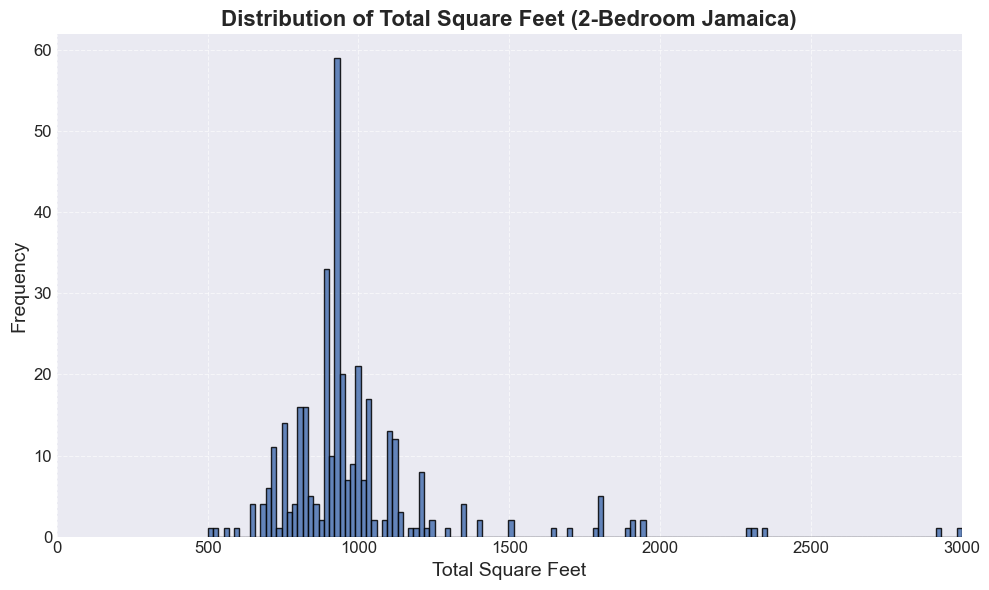

In [64]:
# histogram for 2-bedroom apartments in Jamaica
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(jamaicadftwoB["Total Square Feet"], bins=200, color='#4C72B0', edgecolor='black', alpha=0.85)
ax.set_xlim(0, 3000)
ax.set_title("Distribution of Total Square Feet (2-Bedroom Jamaica)", fontsize=16, fontweight='bold')
ax.set_xlabel("Total Square Feet", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

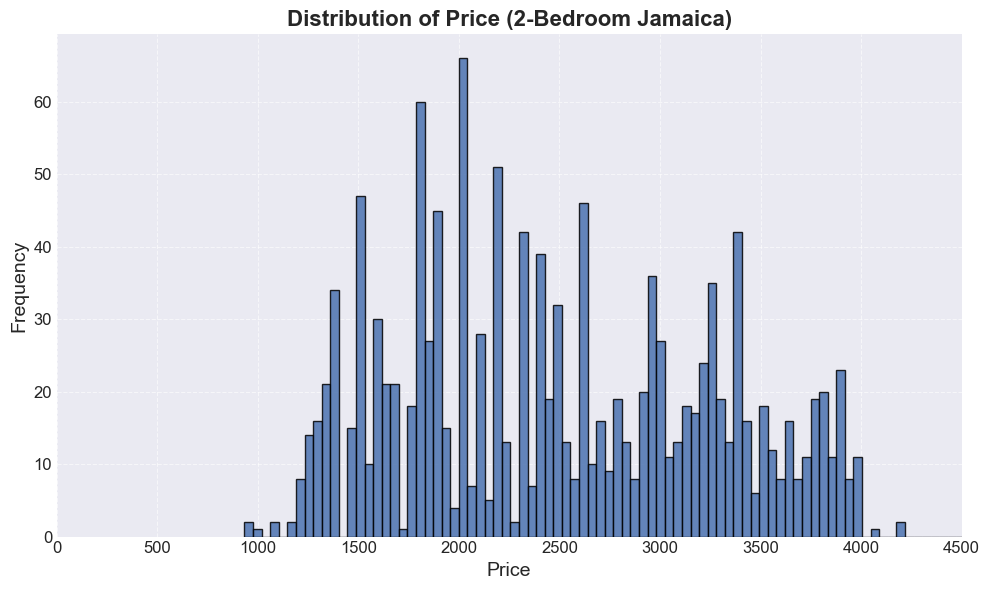

In [65]:
# histogram for 2-bedroom apartments in Jamaica
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(jamaicadftwoB["Price"], bins=400, color='#4C72B0', edgecolor='black', alpha=0.85)
ax.set_xlim(0, 4500)
ax.set_title("Distribution of Price (2-Bedroom Jamaica)", fontsize=16, fontweight='bold')
ax.set_xlabel("Price", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

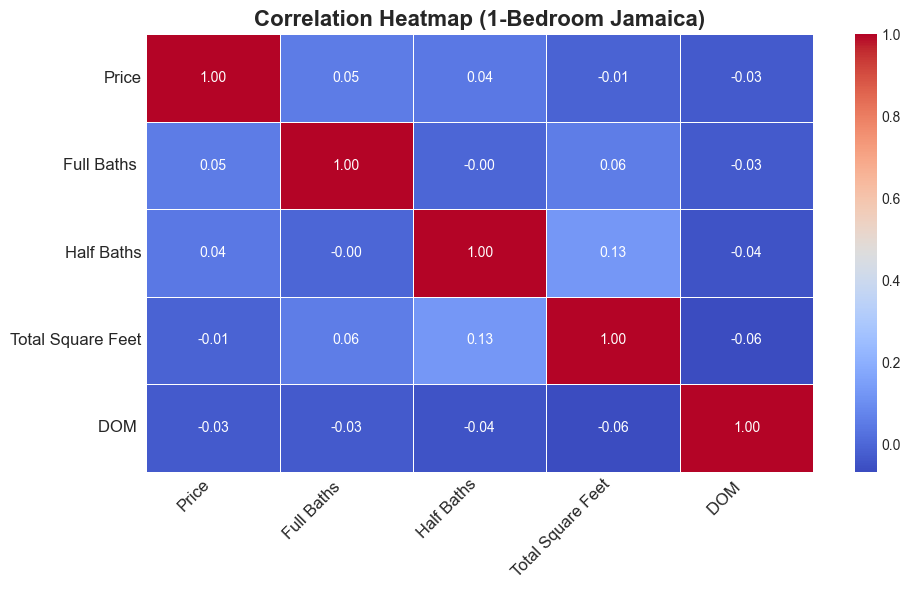

In [69]:
# Correlation heatmap for 1 bedroom apartments in Jamaica
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))

numeric_cols = jamaicaOneBrnonan.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=ax, linewidths=0.5)
ax.set_title('Correlation Heatmap (1-Bedroom Jamaica)', fontsize=16, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

Column 'Building Type' not found in nycdfOneB. Available columns:
['Address', 'Status', 'Listing Type', 'Building', 'Neighborhood', 'City', 'Price', 'Beds', 'Full Baths ', 'Half Baths', 'Total Square Feet', 'DOM ', 'Move in Date', 'Updated Date', 'List Date', 'Rented Date', 'Property Type']


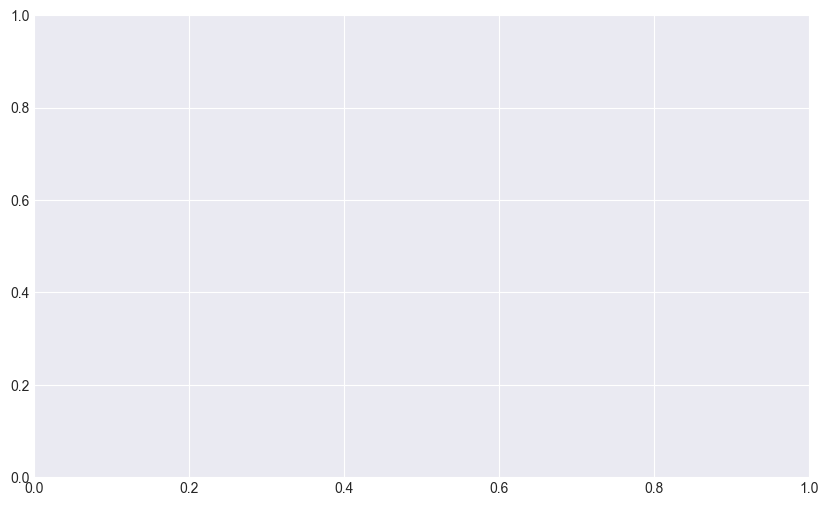

In [70]:
# Rental Price Distribution by Building Type
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))
if 'Building Type' in nycdfOneB.columns:
    sns.boxplot(data=nycdfOneB, x='Building Type', y='Price', palette='Set2', ax=ax, linewidth=1.5)
    ax.set_title('Rental Price Distribution by Building Type (1-Bedroom NYC)', fontsize=16, fontweight='bold')
    ax.set_xlabel('Building Type', fontsize=14)
    ax.set_ylabel('Price ($)', fontsize=14)
    ax.tick_params(axis='both', labelsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Building Type' not found in nycdfOneB. Available columns:")
    print(nycdfOneB.columns.tolist())